In [1]:
import pandas as pd
import numpy as np
from scipy.stats import triang, beta
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.titlesize'] = 22
# plt.rcParams['figure.figsize'] = 13, 13

In [2]:
def barplot(x, y, title=None, xlabel=None, ylabel=None, width = 0.015, 
            color = 'lightsteelblue', ynbins=5, ax=None, **kwargs):
    if not ax:
        fig, ax = plt.subplots()
    ax.bar(x,y,width=width, color=color, **kwargs)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.locator_params(axis='y',nbins=ynbins)
    return ax

In [3]:
def bi_likelihood(theta, outcomes):
    z = np.sum(outcomes)
    n = len(outcomes)
    return np.multiply(
        np.power(theta,z),
        np.power(np.subtract(1,theta),(n-z))
    ), z, n

def evidence(likelihood,prior):
    return np.sum(np.multiply(likelihood, prior))

def posterior(likelihood,prior,evidence):
    return likelihood*prior/evidence
    

Figure5.1 Bayes’ruleappliedtoestimatingthebiasofacoin.Therearediscretecandidatevaluesof θ. At each value of θ , the posterior is computed as prior times likelihood, normalized. In the data, denoted D, the number of heads is z and the number of  ips is N.

In [4]:
theta = np.linspace(0,1,11)
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [5]:
pTheta = triang.pdf(theta,.5)
pTheta /= np.sum(pTheta)
pTheta

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.16, 0.12, 0.08, 0.04, 0.  ])

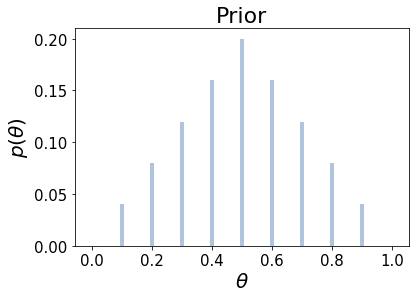

In [6]:
barplot(theta, pTheta, title='Prior', xlabel=r'$\theta$', ylabel=r'$p(\theta)$');

In [7]:
data = [1]
pData_t, z, n = bi_likelihood(theta,data) # likelihood of data given theta
pData = evidence(pData_t,pTheta) # evidence of data
pTheta_d = posterior(pData_t, pTheta, pData) # prob of theta given data (aka posterior)

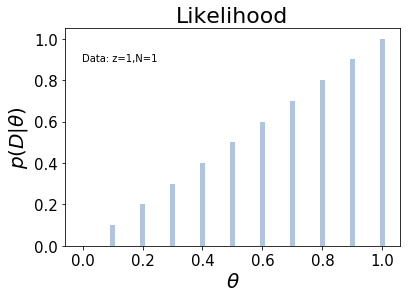

In [8]:
ax = barplot(theta, pData_t, title='Likelihood', xlabel=r'$\theta$', ylabel=r'$p(D|\theta)$', 
                ynbins=6);
ax.annotate('Data: z=%d,N=%d'%(z,n), xy=(0.05,0.85), xycoords="axes fraction");

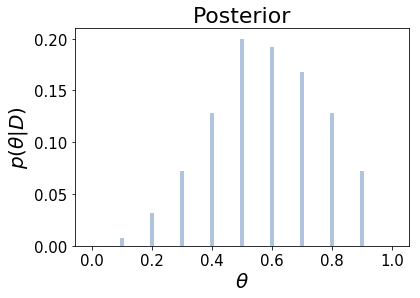

In [9]:
barplot(x=theta, 
        y=pTheta_d, 
        title='Posterior', xlabel=r'$\theta$', ylabel=r'$p(\theta|D)$');

# Influence of sample size on posterior

In [10]:
theta = np.linspace(0,1,1001)
theta

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

In [11]:
pTheta = triang.pdf(theta,.5)
pTheta /= np.sum(pTheta)
pTheta

array([0.e+00, 4.e-06, 8.e-06, ..., 8.e-06, 4.e-06, 0.e+00])

In [12]:
data_left = [1,0,0,0]
data_right = 10*data_left

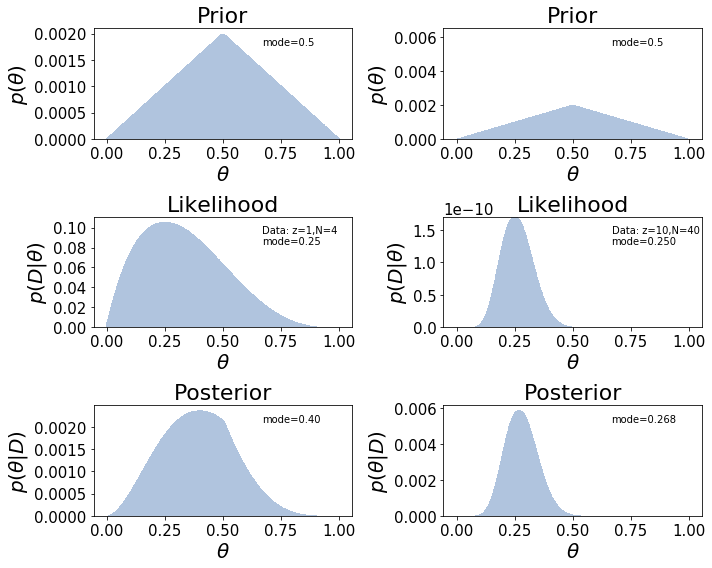

In [13]:
fig, axs = plt.subplots(3,2,figsize=(10,8))
axs = axs.flatten()
axs[0] = barplot(theta, pTheta, title='Prior', xlabel=r'$\theta$', ylabel=r'$p(\theta)$',ax=axs[0])
axs[0].annotate('mode=%.1f' % theta[np.argmax(pTheta)], 
                xy=(0.65,0.85), xycoords="axes fraction");

axs[1] = barplot(theta, pTheta, title='Prior', xlabel=r'$\theta$', ylabel=r'$p(\theta)$',ax=axs[1])
axs[1].set_ylim(0,.0065)
axs[1].annotate('mode=%.1f' % theta[np.argmax(pTheta)], 
                xy=(0.65,0.85), xycoords="axes fraction");

#small data 
pData_t, z, n = bi_likelihood(theta,data_left) # likelihood of data given theta
pData = evidence(pData_t,pTheta) # evidence of data
pTheta_d = posterior(pData_t, pTheta, pData) # prob of theta given data (aka posterior)
#small data likelihood
axs[2] = barplot(theta, pData_t, title='Likelihood', xlabel=r'$\theta$', ylabel=r'$p(D|\theta)$', 
                ynbins=6, ax=axs[2]);
axs[2].annotate('Data: z=%d,N=%d'%(z,n), xy=(0.65,0.85), xycoords="axes fraction");
axs[2].annotate('mode=%.2f' % theta[np.argmax(pData_t)], 
                xy=(0.65,0.75), xycoords="axes fraction");
#small data posterior
axs[4] = barplot(x=theta, y=pTheta_d, title='Posterior', xlabel=r'$\theta$', 
                 ylabel=r'$p(\theta|D)$', ax=axs[4]);
axs[4].annotate('mode=%.2f' % theta[np.argmax(pTheta_d)], 
                xy=(0.65,0.85), xycoords="axes fraction");

#large data 
pData_t, z, n = bi_likelihood(theta,data_right) # likelihood of data given theta
pData = evidence(pData_t,pTheta) # evidence of data
pTheta_d = posterior(pData_t, pTheta, pData) # prob of theta given data (aka posterior)
#small data likelihood
axs[3] = barplot(theta, pData_t, title='Likelihood', xlabel=r'$\theta$', ylabel=r'$p(D|\theta)$', 
                ynbins=6, ax=axs[3]);
axs[3].annotate('Data: z=%d,N=%d'%(z,n), xy=(0.65,0.85), xycoords="axes fraction");
axs[3].annotate('mode=%.3f' % theta[np.argmax(pData_t)], 
                xy=(0.65,0.75), xycoords="axes fraction");
#small data posterior
axs[5] = barplot(x=theta, y=pTheta_d, title='Posterior', xlabel=r'$\theta$', 
                 ylabel=r'$p(\theta|D)$', ax=axs[5]);
axs[5].annotate('mode=%.3f' % theta[np.argmax(pTheta_d)], 
                xy=(0.65,0.85), xycoords="axes fraction");

plt.tight_layout()

# Influence of the prior on the posterior

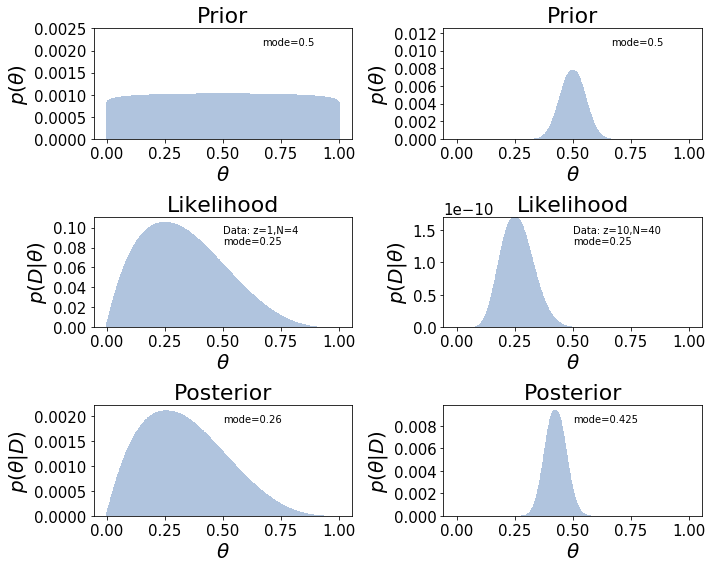

In [14]:
fig, axs = plt.subplots(3,2,figsize=(10,8))
axs = axs.flatten()

#small data 
pTheta = beta.pdf(theta,1.05,1.05)
pTheta /= np.sum(pTheta)

axs[0] = barplot(theta, pTheta, title='Prior', xlabel=r'$\theta$', ylabel=r'$p(\theta)$',
                 ax=axs[0])
axs[0].set_ylim(0,.0025)
axs[0].annotate('mode=%.1f' % theta[np.argmax(pTheta)], 
                xy=(0.65,0.85), xycoords="axes fraction");

pData_t, z, n = bi_likelihood(theta,data_left) # likelihood of data given theta
pData = evidence(pData_t,pTheta) # evidence of data
pTheta_d = posterior(pData_t, pTheta, pData) # prob of theta given data (aka posterior)
#small data likelihood
axs[2] = barplot(theta, pData_t, title='Likelihood', xlabel=r'$\theta$', ylabel=r'$p(D|\theta)$', 
                ynbins=6, ax=axs[2]);
axs[2].annotate('Data: z=%d,N=%d'%(z,n), xy=(0.5,0.85), xycoords="axes fraction");
axs[2].annotate('mode=%.2f' % theta[np.argmax(pData_t)], 
                xy=(0.5,0.75), xycoords="axes fraction");
#small data posterior
axs[4] = barplot(x=theta, y=pTheta_d, title='Posterior', xlabel=r'$\theta$', 
                 ylabel=r'$p(\theta|D)$', ax=axs[4]);
axs[4].annotate('mode=%.2f' % theta[np.argmax(pTheta_d)], 
                xy=(0.5,0.85), xycoords="axes fraction");

#large data 
pTheta = beta.pdf(theta,47.5,47.5)
pTheta /= np.sum(pTheta)

axs[1] = barplot(theta, pTheta, title='Prior', xlabel=r'$\theta$', ylabel=r'$p(\theta)$',
                 ax=axs[1],ynbins=7)
axs[1].set_ylim(0,.0125)
axs[1].annotate('mode=%.1f' % theta[np.argmax(pTheta)], 
                xy=(0.65,0.85), xycoords="axes fraction");

pData_t, z, n = bi_likelihood(theta,data_right) # likelihood of data given theta
pData = evidence(pData_t,pTheta) # evidence of data
pTheta_d = posterior(pData_t, pTheta, pData) # prob of theta given data (aka posterior)
#small data likelihood
axs[3] = barplot(theta, pData_t, title='Likelihood', xlabel=r'$\theta$', ylabel=r'$p(D|\theta)$', 
                ynbins=6, ax=axs[3]);
axs[3].annotate('Data: z=%d,N=%d'%(z,n), xy=(0.5,0.85), xycoords="axes fraction");
axs[3].annotate('mode=%.2f' % theta[np.argmax(pData_t)], 
                xy=(0.5,0.75), xycoords="axes fraction");
#small data posterior
axs[5] = barplot(x=theta, y=pTheta_d, title='Posterior', xlabel=r'$\theta$', 
                 ylabel=r'$p(\theta|D)$', ax=axs[5]);
axs[5].annotate('mode=%.3f' % theta[np.argmax(pTheta_d)], 
                xy=(0.5,0.85), xycoords="axes fraction");

plt.tight_layout()

# Exercises

Exercise 5.1. [Purpose: Iterative application of Bayes’ rule, and seeing how posterior probabilities change with inclusion of more data.] This exercise extends the ideas of Table 5.4, so at this time, please review Table 5.4 and its discussion in the text. Suppose that the same randomly selected person as in Table 5.4 gets re-tested after the  rst test result was positive, and on the re-test, the result is negative. When taking into account the results of both tests, what is the probability that the person has the disease? Hint: For the prior probability of the re-test, use the posterior computed from the Table 5.4. Retain as many decimal places as possible, as rounding can have a surprisingly big e ect on the results. One way to avoid unnecessary rounding is to do the calculations in R.

In [15]:
theta = [0,1]
pTheta = [.999, .001]
pPos_theta = [.05, .99]
pNeg_theta = np.subtract(1,pPos_theta)
# p(theta=1 | T=pos)? p(T=pos|theta=1)* pTheta / pPos
new_prior = pPos_theta[1]*pTheta[1]/np.sum(np.multiply(pPos_theta,pTheta))
print(new_prior)
# bi_likelihood(theta,[1])[0],evidence(bi_likelihood(theta,[1])[0],pTheta)
# posterior(bi_likelihood(theta,[1])[0],pTheta,evidence(bi_likelihood(theta,[1])[0],pTheta))
pTheta = [1-new_prior, new_prior]
# p(theta=1 | T=neg)? p(T=neg|theta=1)* pTheta / pNeg
pNeg_theta[1]*pTheta[1]/np.sum(np.multiply(pNeg_theta,pTheta))

0.019434628975265017


0.00020858616504854387

In [16]:
n=100000
.05*.999*n,.05*.999*n+99,.95*.999*n,.95*.999*n+1,99/(.05*.999*n+99)

(4995.0, 5094.0, 94905.0, 94906.0, 0.019434628975265017)

In [17]:
10000*.99,10000*.99*.01,9990000*.05,9990000*.05*.95

(9900.0, 99.0, 499500.0, 474525.0)